In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [25]:
categoricals = customer_df.select_dtypes(include=object)
numericals = customer_df.select_dtypes(include=np.number)

In [26]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


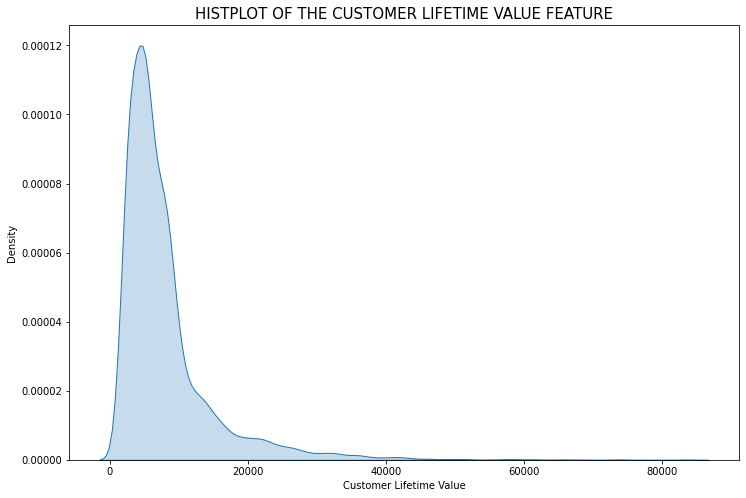

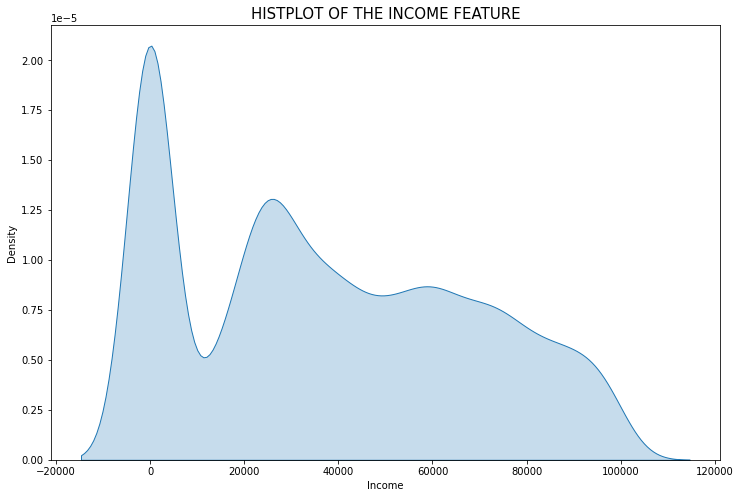

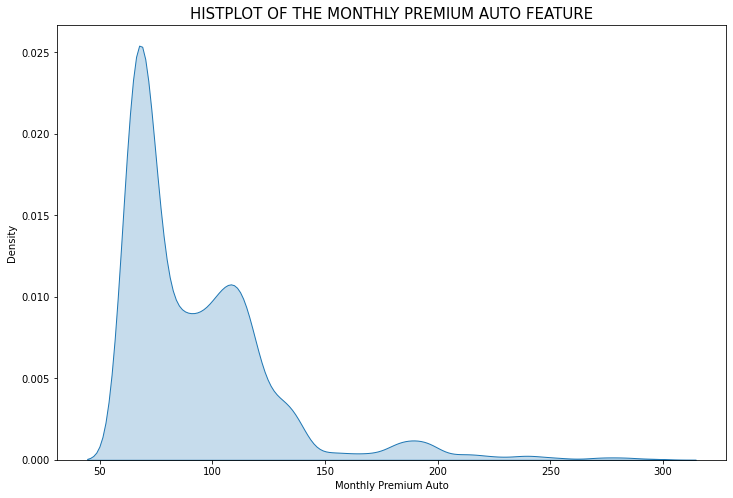

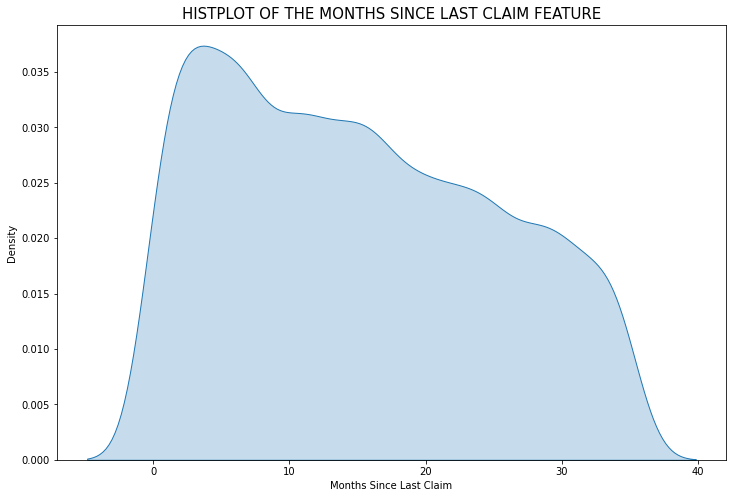

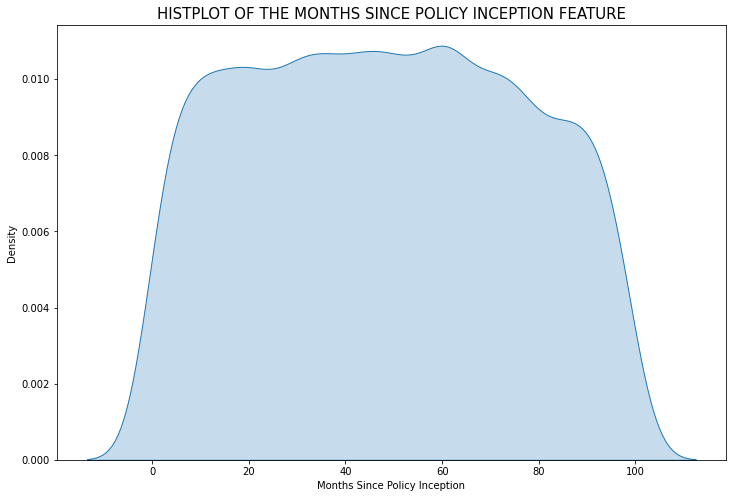

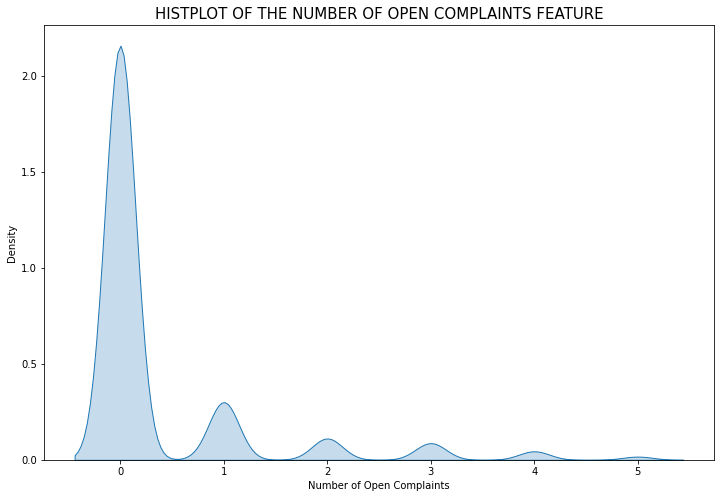

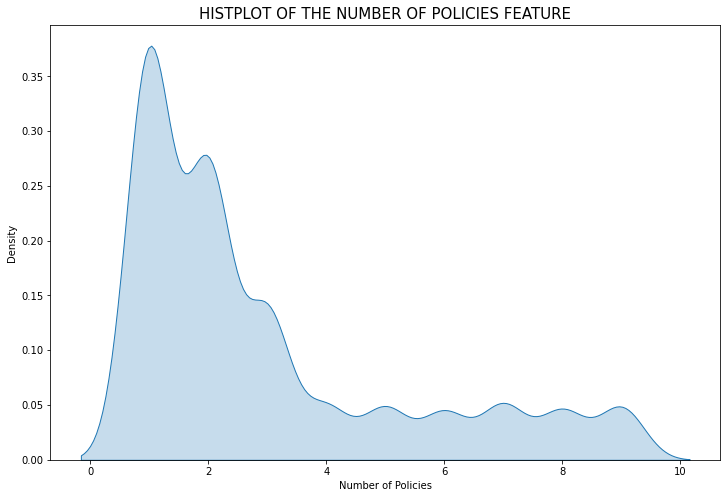

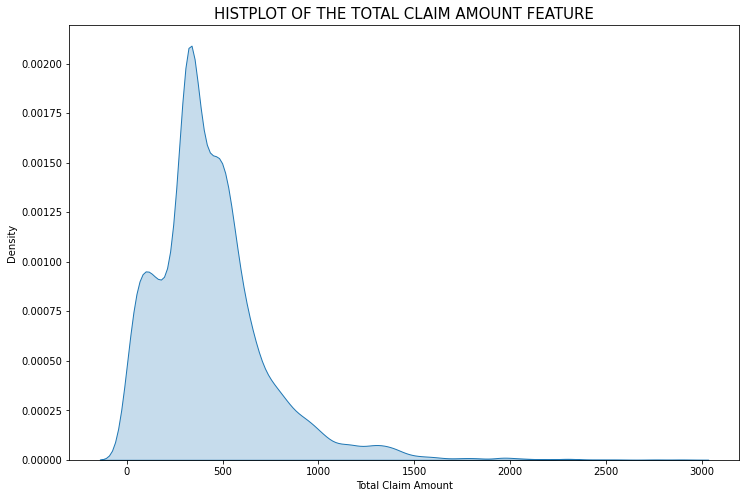

In [27]:
def numerical_exploration_data(numericals, column):

    fig = plt.figure(figsize = (12, 8))
    sns.kdeplot(x = column, data = numericals, fill = True)
    plt.title(f'HISTPLOT OF THE {column.upper()} FEATURE', fontsize = 15)

    return plt.show()



for column in numericals.columns:
        numerical_exploration_data(numericals, column)

I can see that most columns have an exponential distribution:
- Customer lifetime value
- Income (but has a big outlier)
- Monthly premium auto
- Number of open complaints
- Number of policies
- total claim amount

In [40]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

for column in numericals:
    numericals[column] = numericals[column].apply(log_transform)

/var/folders/x0/lydc794d7tjbpf7r4sygzwrw0000gn/T/ipykernel_45417/4217839461.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericals[column] = numericals[column].apply(log_transform)


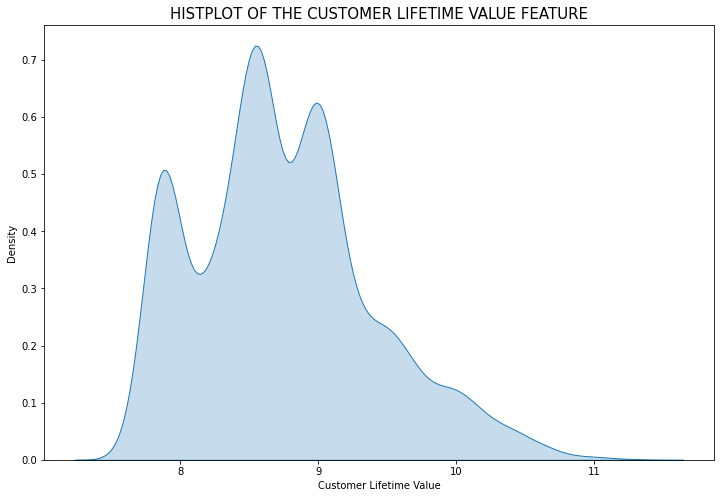

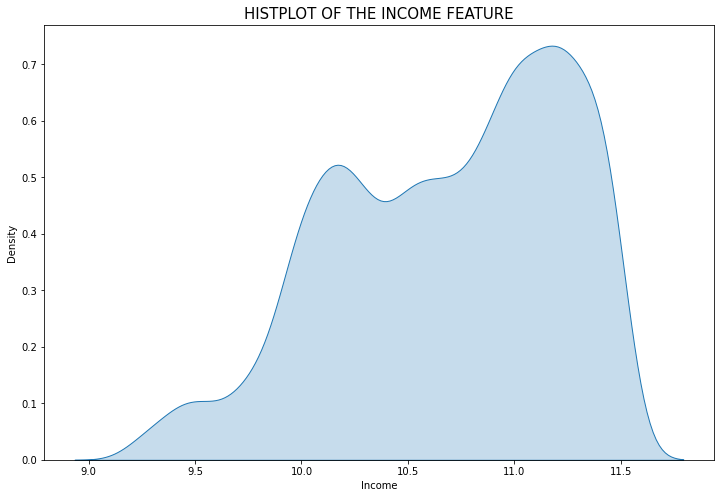

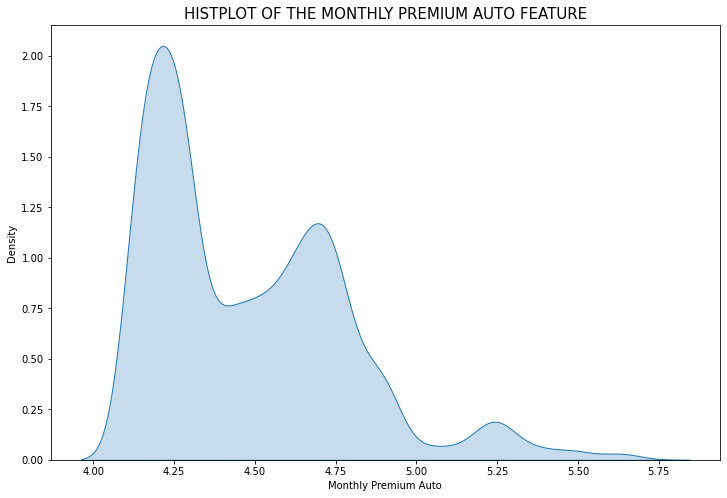

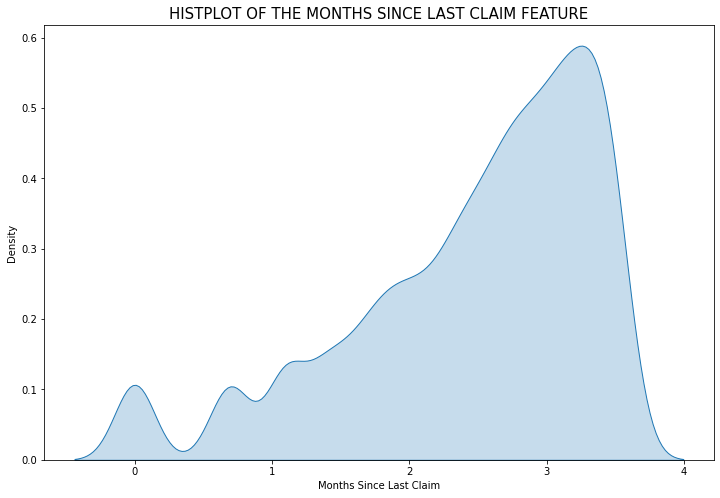

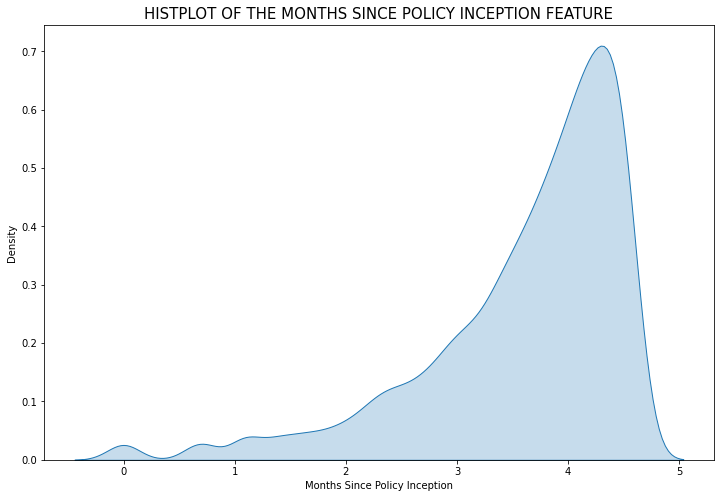

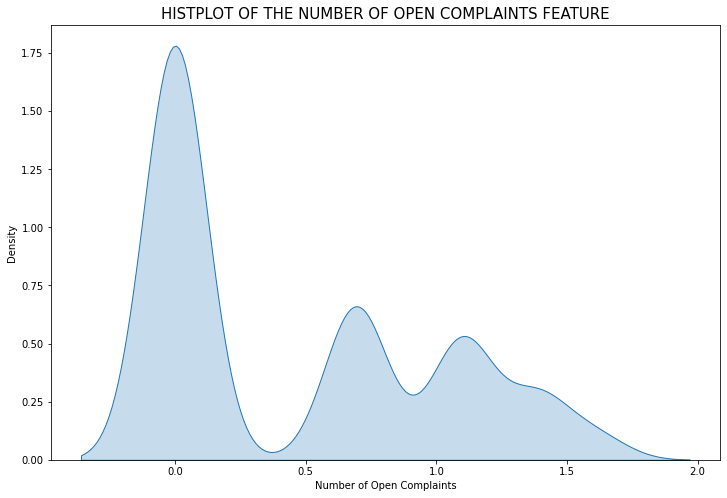

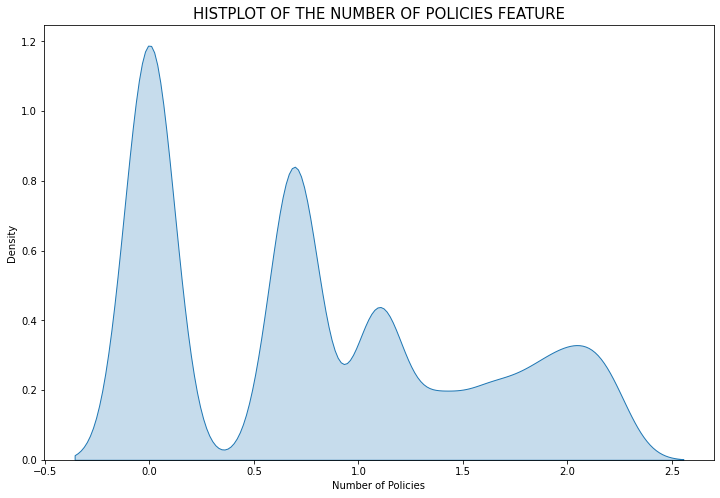

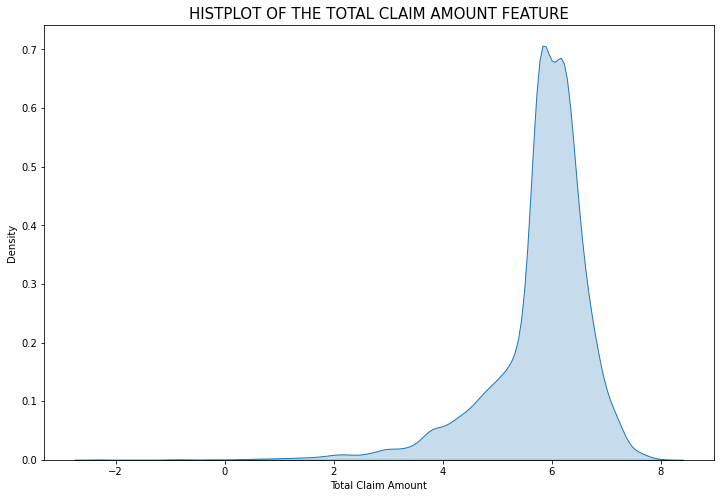

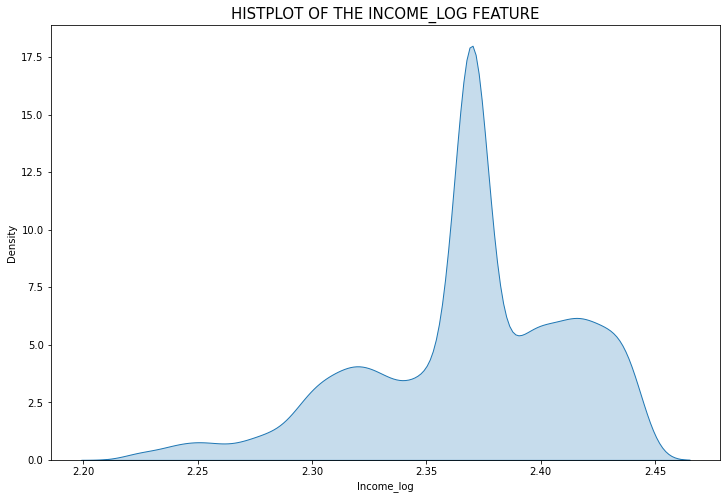

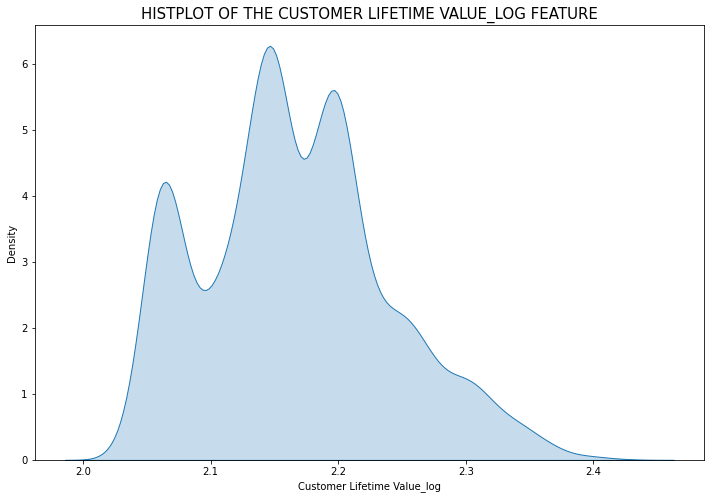

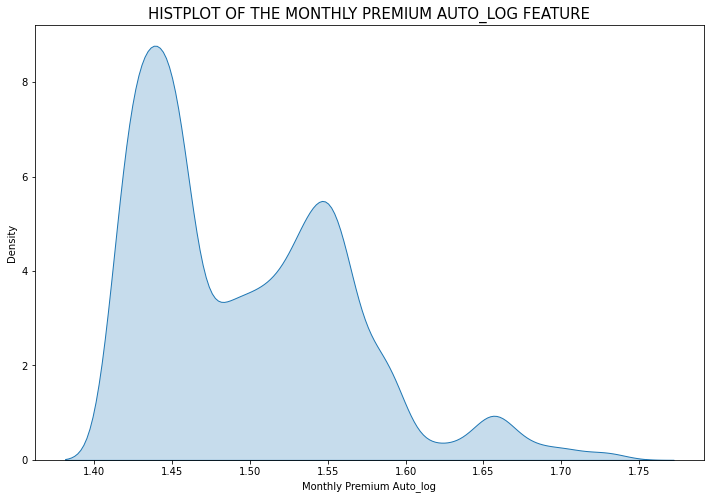

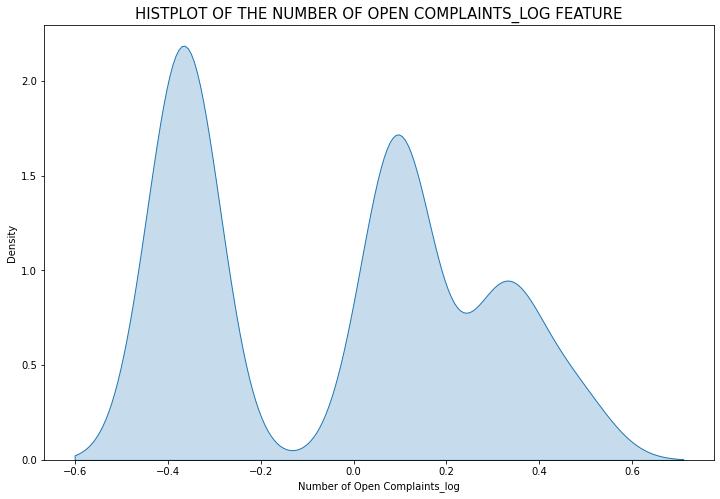

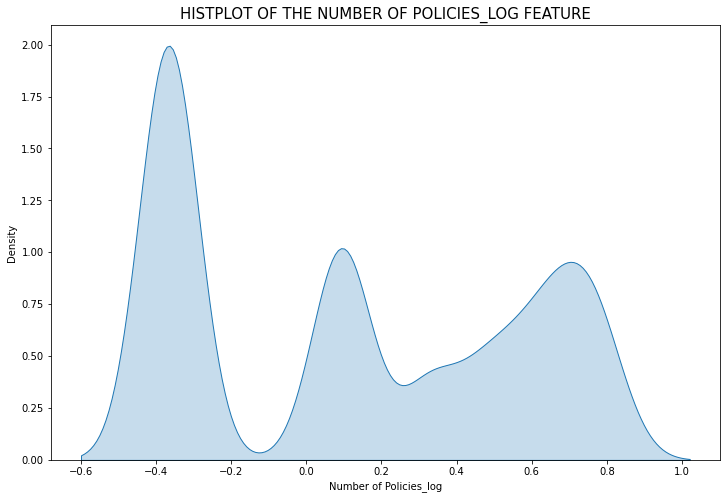

In [41]:
def numerical_exploration_data(numericals, column):

    fig = plt.figure(figsize = (12, 8))
    sns.kdeplot(x = column, data = numericals, fill = True)
    plt.title(f'HISTPLOT OF THE {column.upper()} FEATURE', fontsize = 15)

    return plt.show()



for column in numericals.columns:
        numerical_exploration_data(numericals, column)

After applying a log transformation, we can observe that:

- Customer lifetime value: no loger has an exponential distribution
- Income: no loger has an exponential distribution
- Monthly premium auto: still has an exponential distribution but less accentuated
- Number of open complaints: less exponential and more normally distributed. However there are a lot of o complaints that could interfere as aoutliers.
- Number of policies: it happens the same as with number of open complaints.